In [ ]:
%pylab inline
import pandas as pd
import scipy
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

# Homework 4
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.



**Your group member:**

---



# Note regarding the questions:

For Q1, I took it upon myself to try my own implimentation of the K-means, which turned out to work most of the time, albeit has some issues generating clusters for higher $K$. While my answers could be wrong, I care more about trying it for myself rather than knowing the response will be correct and not learning as much.

For Q2, I used the lecture code to run things more efficiently, trying my best to learn from what was done in lecture, v.s my implimentation.

For Q3.5, again I used the lecture code, but in hindsight, it wasn't as necessary to do so. (also only worth 5 points)


---


---



# Q1: K-means clustering (30pt)

In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique.




## Q1.1  Alternative optimization Steps (10pt)

- Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$

- Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation.




# Your Solution:

1) Fix $\mu_{j'}\in \{\mu_{j}\}$ and assume $J$ is minimal. By the assertion that for each $i$, there is one and only one $j$ such that $r_{ij}=1$,  we consider some $i'$ s.t. $J_{i'} = \sum_{j=1}^K r_{i'j}\|\mathbf{x}^{(i')}-\mu_j\|_2^2 = r_{i'j'}\|\mathbf{x}^{(i')}-\mu_{j'}\|_2^2,$ where $j'$ is the only such $j$ where $r_{i'j} = 1.$ By the assumption that $J$ is minimal, $J_{i'}$ is minimal, so we must have that $\|\mathbf{x}^{(i')}-\mu_{j'}\|_2^2$ is minimal for our choice of $j$, i.e. $j' = \text{arg}\min_{k \in \{ 1,2,...,K\}} \|\mathbf{x}^{(i)}-\mu_k\|_2^2.$ Thus,

$$r_{ij'} = \begin{cases} 1, & \text{if } j' = \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0, & \text{Otherwise}\end{cases}$$

$$
\\
\\
$$

2) Fix $\{r_{ij}\}$ and assume $J$ is minimal. Consider some set $I$ s.t. $\forall i\in I,$ $J_{i}$ is minimal for some $j_i$. By the assertion that for each $i$, there is a unique $\mathbf{x}^{(i)}$ corresponding to $r_{ij_i}=1,$ we set $S_I = \{\mathbf{x}^{(i)}\}_{i\in I}$, where for some $i' \in I,$ there is an $\mathbf{x}^{(i')} \in S_I$. Thus, $|S_I| = |I| = \sum_{i\in I} r_{ij}$.

By the definition of $\mu_j$, we have $$\mu_j = \frac{\sum_{\mathbf{x}\in S_I} \mathbf{x}}{|S_I|} = \frac{\sum_{i\in I} \mathbf{x}^{(i)}}{|I|} = \frac{\sum_{i\in I} r_{ij}\mathbf{x}^{(i)}}{\sum_{i\in I} r_{ij}}$$





---


## Q1.2 MNIST: Implementation (10pt)
The objective function in  K-means to minimize is
$$ \min_{\mu\in\mathbb{R}^{d\times K}}\sum_{j=1}^K \sum_{\mathbf{x}^{(i)}\in \mathcal{C}_j}\|\mathbf{x}^{(i)}-\mu_j\|^2$$

The Lloyd’s algorithm, the commonly-used heuristic which we discussed in lecture, typically works well to minimize this objective function. You need to use the function implemented in class.

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]

n = Xtr.shape[0]
d = Xtr.shape[1]*Xtr.shape[2]
X_train = np.zeros((n,d))
for i in range(n):
    X_train[i] = Xtr[i].reshape((d,))

n_test = Xte.shape[0]
X_test = np.zeros((n_test,d))
for j in range(n_test):
    X_test[j] = Xte[j].reshape((d,))

Run the Lloyd's algorithm on the training dataset of MNIST with $K = 10$, plotting the objective function as a function of the iteration number.  Visualize (and include in your report) the cluster centers as a $28 \times 28$ image.

In [ ]:
from itertools import repeat

def get_initial_mu(K,d):
    '''
    returns an array of K mu vectors of size d to use as the initial
    cluster centers for the first iteration of Llyod's Algorithm.

    Input:
        K (int) - the number of clusters
        d (int) - the size of a single sample vector
    Output:
        a Kxd numpy array
    '''

    return_array = np.zeros((K,d))
    for k in range(K):
        # uses just a random selection from [0,1]
        temp = np.random.rand(d)
        return_array[k] = temp
    return return_array

def cluster_assignment(X, mu_array):
    '''
    returns the clustering of all x given a set of cluster centers
    as well as the distortion value J.

    Input:
        X ((n,d) array) - array of training data
        y ((n,1) array) - array of training data "solutions" (used later)
        mu_array ((K,d) array) - array of K cluster centers
    Output:
        list of size K, where each element is a subset of X
        list of size N, where each element is the class min_j,
            aligning with the samples in X
        float J, distortion of the clustering
    '''

    K, d = mu_array.shape
    cluster_array = [[] for i in repeat(None, K)]
    index_list = []

    J = 0

    # finding where each x belongs
    for x in X:
        min_dist = np.infty

        # find which cluster x belongs to
        for j in range(K):
            temp_dist = linalg.norm(x-mu_array[j])**2
            if temp_dist < min_dist:
                min_dist = temp_dist
                min_j = j
        # put x in cluster
        cluster_array[min_j].append(x)
        J += linalg.norm(x-mu_array[min_j])**2
        index_list.append(min_j)

    return cluster_array, index_list, J

def get_centers(clusters, K, d):
    '''
    returns new cluster centers given a set of clusters

    Input:
        clusters - list of K disjoint subsets of X
        K (int) - the number of clusters
        d (int) - the size of a single sample vector
    Output:
        a Kxd numpy array
    '''
    centers = np.zeros((K,d))

    for j in range(len(clusters)):
        cluster = clusters[j]
        sum = np.zeros((d,))
        for x in cluster:
            sum = sum + x
        centers[j] = sum/len(cluster)

    return centers


In [ ]:
K = 10
n, d = X_train.shape

# initialization
mu = get_initial_mu(K,d)
distortion_list = []

# stopping variables
iter = 0
# setting ratio to 1 means we stop when distortions are equal (no change)
ratio_stop_value = 1
max_iterations = 100
max_iter_reached = True

# loop has two exits: either the last two distortion values are equal (or close to equal)
# OR the iterations reaches the max iterations
while iter < max_iterations:

    # updating clusters using centers
    clusters, index_list, J = cluster_assignment(X_train, mu)
    distortion_list.append(J)

    # updating centers using clusters
    mu = get_centers(clusters, K, d)

    # stopping criterion - checks ratio of current and previous distortion
    # values and stops if above "ratio_stop_value"
    n = len(distortion_list)
    if n > 1:
        if distortion_list[n-1]/distortion_list[n-2] >= ratio_stop_value:
            max_iter_reached = False
            break

    # iteration
    iter += 1

if max_iter_reached:
    print("Max iterations reached.")
    print("Number of iterations:", iter)
else:
    print("Stopping Criterion met!")
    print("Number of iterations:", iter)


Stopping Criterion met!
Number of iterations: 54


Text(0.5, 1.0, 'Distortion of MNIST K-Means')

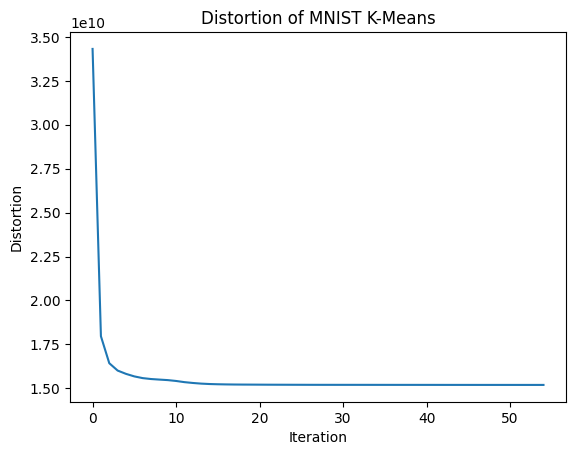

In [ ]:
plt.plot(distortion_list)
plt.xlabel("Iteration")
plt.ylabel("Distortion")
plt.title("Distortion of MNIST K-Means")

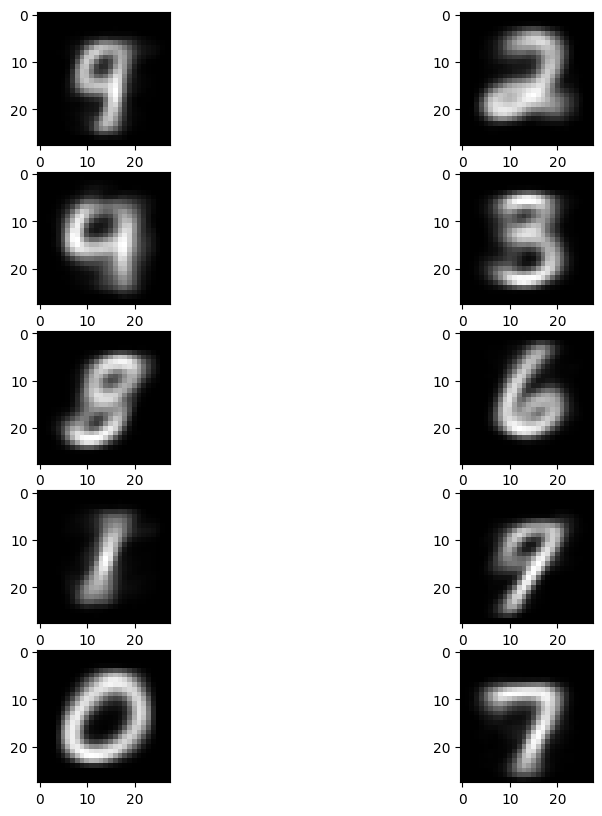

In [ ]:
mu = mu.reshape(K,28,28)

fig, axs = plt.subplots(5, 2,figsize=(10,10))
axs = axs.ravel()

for i in range(K):
    axs[i].imshow(mu[i], cmap=plt.get_cmap('gray'))



---


## Q1.3: MNIST: find optimal $K$ (10pt)
For $K = \{2, 4, 8, 16, 32\}$, run the  Lloyd's  algorithm on the training dataset to obtain centers $\{\mu_j\}_{j=1}^K$. If $\{\mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^{6000}$ and $\{\mathbf{x}'^{(j)}, y'^{(j)}\}_{j=1}^{1000}$ denote the training and test sets, respectively, plot the training error and test error (defined below) as a function of $K$ on the same
plot.
\begin{align}
&\text{Training Error: } \frac{1}{6000}\sum_{i=1}^{6000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}^{(i)}\|_2^2\\
& \text{Testing Error: } \frac{1}{1000}\sum_{j=1}^{1000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}'^{(j)}\|_2^2\\
\end{align}

You need to use the function implemented in class.

In [ ]:
def error(X, centers, K):

    error = 0
    for x in X:
        min_val = np.infty
        for k in range(K):
            temp = linalg.norm(x-centers[k])**2
            if linalg.norm(x-centers[k])**2 < min_val:
                min_val = temp
                min_k = k
        error += min_k
    return error/len(X)

k_list = [2,4,8,16,32]

n, d = X_train.shape

error_list = []

# doesn't work sometimes due to randomness of the initialization of mu
# on K = 32 for some reason (getting NaN/inf error). Probably would do well
# to impliment the hueristical initialization (kmeans++)
for K in k_list:

    mu = get_initial_mu(K,d)
    distortion_list = []

    iter = 0
    ratio_stop_value = 1
    max_iterations = 25

    while iter < max_iterations:

        clusters, index_list, J = cluster_assignment(X_train, mu)
        distortion_list.append(J)
        mu = get_centers(clusters, K, d)

        n = len(distortion_list)
        if n > 1:
            if distortion_list[n-1]/distortion_list[n-2] >= ratio_stop_value:
                max_iter_reached = False
                break

        iter += 1

    error_list.append([K, error(X_train, mu, K), error(X_test, mu, K)])


2
4
8
16
32


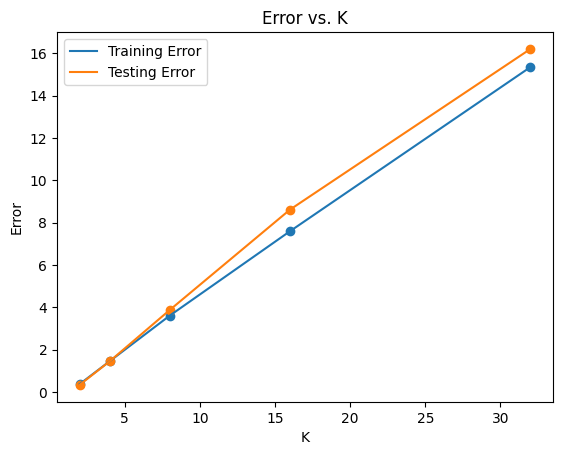

In [ ]:
a = len(k_list)
error_list = np.array(error_list).reshape((3,a))

plt.plot(error_list[0], error_list[1], label="Training Error")
plt.plot(error_list[0], error_list[2], label="Testing Error")
plt.scatter(error_list[0], error_list[1])
plt.scatter(error_list[0], error_list[2])
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Error vs. K")
plt.legend()



---



---

# Q2: NYC Parking (35pt)

As part of the effort of NYC to make its data publicly available and accessible, the city releases every month the full list of all taxi rides around the city. We will be using the dataset from January 2016, which can be found [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full dataset includes over 10M taxi rides. In our course, we will be using a smaller subset of this dataset with only 100k rides (which has also been cleaned up a bit). We will start by loading the data and printing the 10 first rows.

In this homework we will only be interested in the following columns:

- **dropoff_easting** - The horizontal coordinate (east-west) (in UTM-WGS84 (~ in kilometers))
- **dropoff_northing** - The vertical coordinate (north-south) (in UTM-WGS84 (~ in kilometers))

(A full description for each of the other columns can be found [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf))

Define the $2\times N$ array $X$ of drop off locations.

In [ ]:
!wget https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true -O nyc_taxi_rides.csv

--2024-11-10 19:15:12--  https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/yexf308/MachineLearning/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true [following]
--2024-11-10 19:15:12--  https://github.com/yexf308/MachineLearning/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MachineLearning/main/homework/HW3/nyc_taxi_rides.csv [following]
--2024-11-10 19:15:12--  https://raw.githubusercontent.com/yexf308/MachineLearning/main/homework/HW3/nyc_taxi_rides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.gi

In [ ]:
dataset = pd.read_csv('nyc_taxi_rides.csv')

## Print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: N={}'.format(number_of_rows))

## Show the first 5 rows and last 5 rows
print(dataset.loc[0:4])
print(dataset.loc[number_of_rows-5:number_of_rows-1])



Number of rows in the dataset: N=100000
   passenger_count  trip_distance  payment_type  fare_amount  tip_amount  \
0                2       2.768065             2          9.5        0.00   
1                1       3.218680             2         10.0        0.00   
2                1       2.574944             1          7.0        2.49   
3                1       0.965604             1          7.5        1.65   
4                1       2.462290             1          7.5        1.66   

   pickup_easting  pickup_northing  dropoff_easting  dropoff_northing  \
0      586.996941      4512.979705       588.155118       4515.180889   
1      587.151523      4512.923924       584.850489       4512.632082   
2      587.005357      4513.359700       585.434188       4513.174964   
3      586.648975      4511.729212       586.671530       4512.554065   
4      586.967178      4511.894301       585.262474       4511.755477   

    duration  day_of_week  day_of_month  time_of_day  
0  11.516

In [ ]:
X = dataset[['dropoff_easting','dropoff_northing']].values
print('The first 10 rows in X are:\n{}'.format(X[:10, :]))

The first 10 rows in X are:
[[ 588.15511774 4515.18088924]
 [ 584.85048892 4512.63208213]
 [ 585.43418784 4513.17496388]
 [ 586.67153039 4512.55406531]
 [ 585.26247362 4511.75547748]
 [ 585.16897267 4511.54010337]
 [ 588.71017492 4514.20918449]
 [ 585.84396658 4509.54508925]
 [ 583.67108081 4507.73557339]
 [ 587.7012478  4513.70969066]]


In [ ]:
X.shape

(100000, 2)

The following code plots the map of drop off points. The figure you got resembles the shape of the
streets in NYC: [map](https://www.google.com/maps/@40.7328589,-73.9545177,13z)

Text(0.5, 1.0, 'Dropoffs')

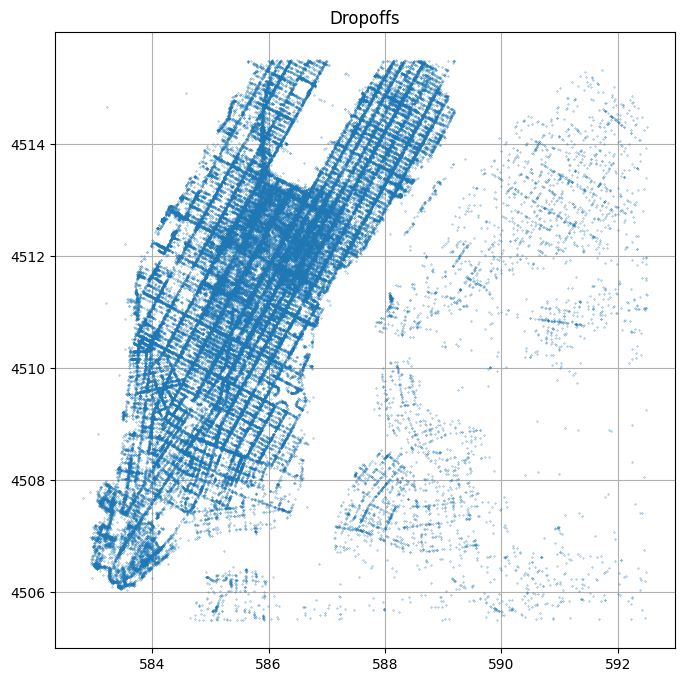

In [ ]:
## Plot the map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(X[:, 0], X[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs')



---


## Q2.1: Finding The Optimal Parking Lots Locations (15pt)
A NY taxi company is looking to rent $K$ parking lots so that their taxis can wait in them in between rides.

It would like to select the optimal locations to place these parking lots such that the average distance from the drop off location to the nearest parking lot will be minimal.

In class, we have searched for the best $K$ locations which will minimize the $L_2$ (Euclidean) distances, but actually, in the case of NYC, it makes more sense to minimize the $L_1$ distance.

In order for the L1 distance to actually be the ride distance, we need to rotate the map such that the streets of NYC will be parallel to the axis.


---


### Rotating the map (5pt)
Rotate the array of drop off points $x$ such that:
- The streets of NYC (going from South-East to North-West) will be parallel to the x axis
- The Avenues of NYC (going from South-west to North-East) will be parallel to the y axis.

Do so by constructing a rotation matrix, and multiply $x$ by that matrix to get the rotated drop off points.

Use the following:

- A normalized vector pointing in a direction parallel to the avenues of NYC:

$$
\boldsymbol{e}_1=\left(0.88, -0.47\right)^T
$$

- A normalized vector pointing in a direction parallel to the streets of NYC:
$$
\boldsymbol{e}_2=\left(0.47, 0.88\right)^T
$$

Make sure that that the streets are now more or less aligned to $x$ and $y$ axis.


(100000, 2)


Text(0.5, 1.0, 'Dropoffs')

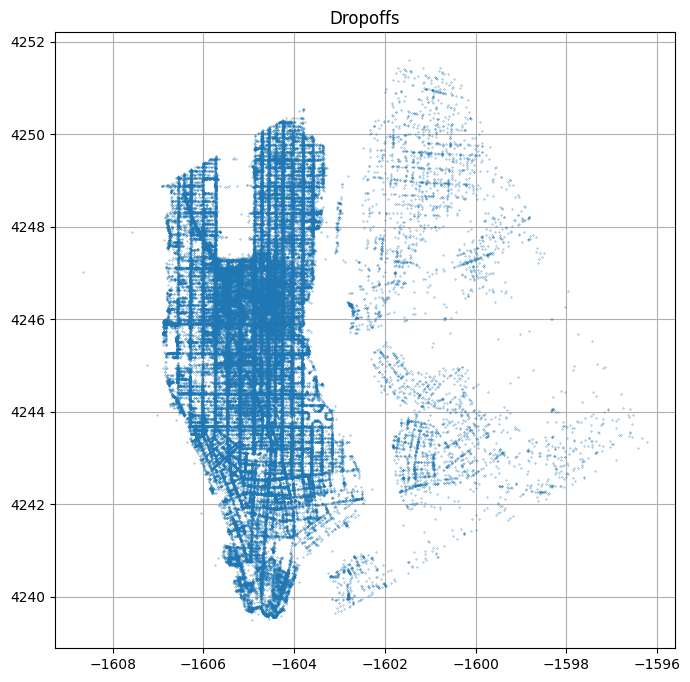

In [ ]:
n, d = X.shape
e = np.array([[0.88,-0.47], [.47, .88]]).T
X_rot = np.dot(X,e)
print(X_rot.shape)

## Plot the map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(X_rot[:, 0], X_rot[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs')



---


### The K-Medians algorithm (10pt)

Similar to the K-Means algorithm, which tries to minimize the sum of squared $L_2$ distances between each point and one of the $K$ centers, there is also a K-Medians algorithm which tries to minimize the sum of $L_1$ distances.

As we saw for the case of the $L_2$, the center point which minimizes the sum of squared $L_2$ distances from a given set of points, is the **mean** point of the given points.

Equivalently, the center point which minimizes the sum of $L_1$ distances from a given set of points is the point which is **median** (in each one of the axis) of the given points.

### The Algorithm

The K-Medians algorithm differs from the K-means algorithm in the following way:

1. The assignment of each point the nearest center will now be based upon the $L_1$ distance instead of the $L_2$ distance.
2. The center will be now calculated using the Median value insted of Mean value.

(a) **Modify K-means code** so that it will implement the K-Medians algorithm with $K=5$. You may use `cdist` to speed up the calculation.

(b) Write a separate function to plot the clusters.



In [ ]:
import random

def plot_clusters(X,  centroids=np.array([[0,0]])):
    plt.scatter(X[:, 0], X[:, 1],  s=1, label='data points')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    if centroids[0].all():
      plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                  color = 'black', label = 'previously selected centroids')
      plt.scatter(centroids[-1, 0], centroids[-1, 1],
                  color = 'red', label = 'next centroid')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

def taxicab_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# initialization for Kmeans++ algorithm
def initialize(X, K):

    ## Step 1: initialize the centroids list and add
    ## a randomly selected data point to the list
    n_samples, n_features = X.shape
    random_sample_idxs = np.random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]
    # plot_clusters(X,centroids)

    ## compute remaining K - 1 centroids
    for c_id in range(K - 1):
        ## Step 2: initialize a list to store distances of data
        ## points from nearest centroid
        ## compute distance of 'point' from each of the previously
        ## selected centroid and store the minimum distance
        dist = np.zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [taxicab_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

        ## Step 3: select data point with maximum distance as our next centroid
        next_centroid = X[np.argmax(dist), :]
        centroids=np.vstack([centroids,next_centroid])
        # plot_clusters(X,centroids)

    return centroids

def plot_kmeans(X,closest, centroids):
    fig, ax = plt.subplots(figsize=(12, 8))
    K = centroids.shape[0]

    for k in range(K):
       point = X[closest==k].T
       ax.scatter(*point)

    for point in centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()

def median_centroids(X, closest,K):
    centroids = np.zeros((K,2))
    for k in range(K):
        centroid = []
        for j in range(len(closest)):
            if closest[j] == k:
                centroid.append(X[j])
        centroid = np.asanyarray(centroid)
        centroids[k] = np.median(centroid, axis=0)

    return centroids

def mykmeans_plus(X, K, centroids, max_iter=100, plot_steps=False):

  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = (np.abs(X - centroids[:, np.newaxis])).sum(axis=2)
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = np.argmin(distances, axis=0)
    centroids_old = centroids
    if plot_steps:
      plot_kmeans(X,closest, centroids)
    # step 2
    ###
    # centroids = np.array([X[closest==k].mean(axis=0) for k in range(K)])
    centroids = median_centroids(X_rot, closest, K)
    ###
    if plot_steps:
      plot_kmeans(X,closest, centroids)
    # step 3
    if sum(centroids-centroids_old) == 0.:
      print('Number of iteration is ', i+1)
      break

  print("plot for K =", K)
  plot_kmeans(X,closest, centroids)
  return centroids, closest, distortion_list

In [ ]:
K=5

parking_lot_locations, closest, distortion_list = mykmeans_plus(X_rot, K, initialize(X_rot, K))


Number of iteration is  24




---




## Q2.2: Finding The Optimal Number of Parking Lots (20pt)



Now let us address the topic of selecting the number of parking lots (the number of clusters)

Basically, to reduce the average ride distance we would like as much parking lots as possible, but in practice operating a parking lots cost money. Let us assume that:

1. The price of operating a parking lot is 10k\\$ per month.

2. There will be exactly 100k rides to the parking lots per month.

3. The estimated price per kilometer for when driving to the parking is estimated at 3$ / kilometer.

Basically, we would now like to minimize the following risk function, which is the monthly cost (in k$) of operating the parking lots plus the cost of driving to them:

$$
\hat{R}\left(\left\{\boldsymbol{c}_i\right\}, K\right)= 10\cdot K+3 \cdot 100\cdot\frac{1}{N}\sum_{i=1}^K\sum_{\boldsymbol{x}_j\in S_i}\left\lVert\boldsymbol{x}_j-\boldsymbol{c}_i\right\rVert_1
$$

Where:

- $K$ is the number of parking lots.
- $\left\{\boldsymbol{c}_i\right\}$ is the locations of the $K$ parking lots.
- $N$ is the number of rides in the dataset.
- $\left\{\boldsymbol{x}_i\right\}$ is the set of dropping points in the data set.
- $S_i$ is the set of dropping points which are assigned to the $i$-th parking lot.


---



### Calculate risk (5pt)
Complete the following code to calculate for calculating the risk function.



In [ ]:
def calc_risk(parking_lots_locations, x, closest, cost_per_parking, cost_per_avarage_distance):
    n, d = x.shape
    K = parking_lots_locations.shape[0]

    risk = 10*cost_per_parking
    summand = np.zeros((K,))
    for j in range(n):
        k = closest[j]
        summand[k] += np.sum(np.abs(x[j]-parking_lots_locations[k]))
    return risk + (3*cost_per_avarage_distance/n)*np.sum(summand)

In [ ]:
cost_per_parking = 10
cost_per_avarage_distance = 300

risk = calc_risk(parking_lot_locations, X_rot, closest, cost_per_parking, cost_per_avarage_distance)
print(risk)

1266.8275614384863




---





### Brute force optimization (15pt)

We will find the optimal $K$ simply be checking all the relevant values of $K$. For this case, we will check all $K$'s between 1 and 30.

We will split data (80% train, 20% test) for selecting the optimal $K$.


Complete the following code to split the data and calculate the risks for $K=1,2,3,...,30$.

- For each $K$, use the training data to find the $K$ parking lots locations.

- Use the test dataset to calculate the risk.


Number of iteration is  2
plot for K = 1


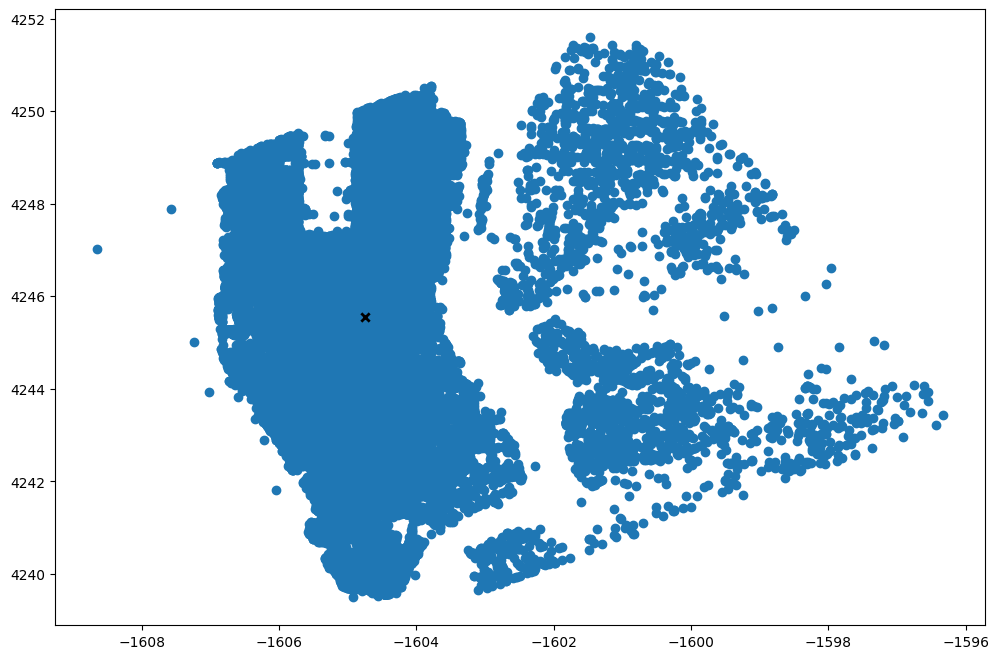

Number of iteration is  28
plot for K = 2


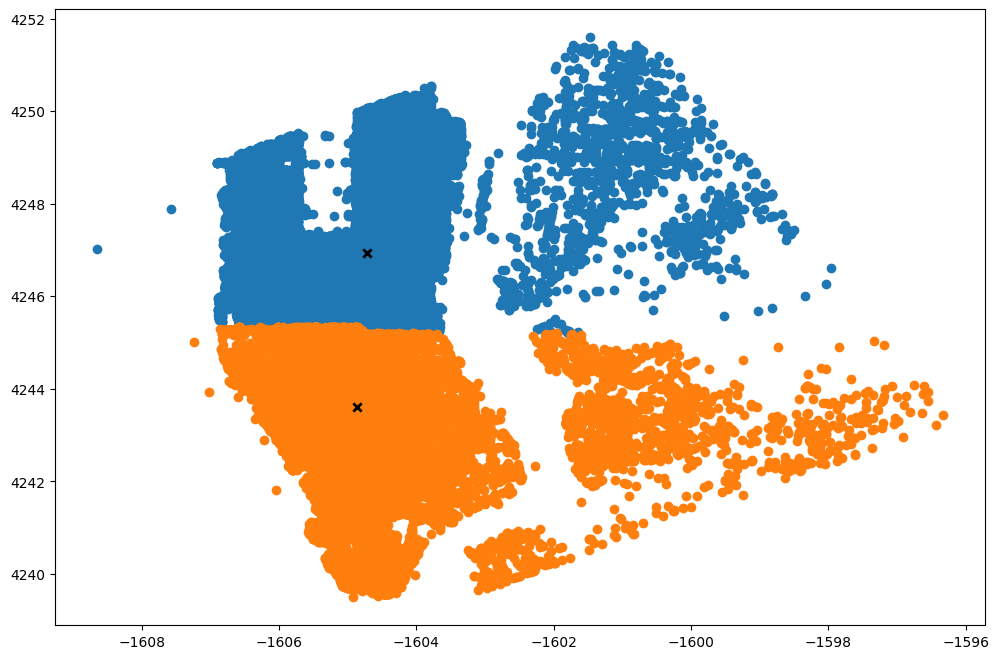

Number of iteration is  22
plot for K = 3


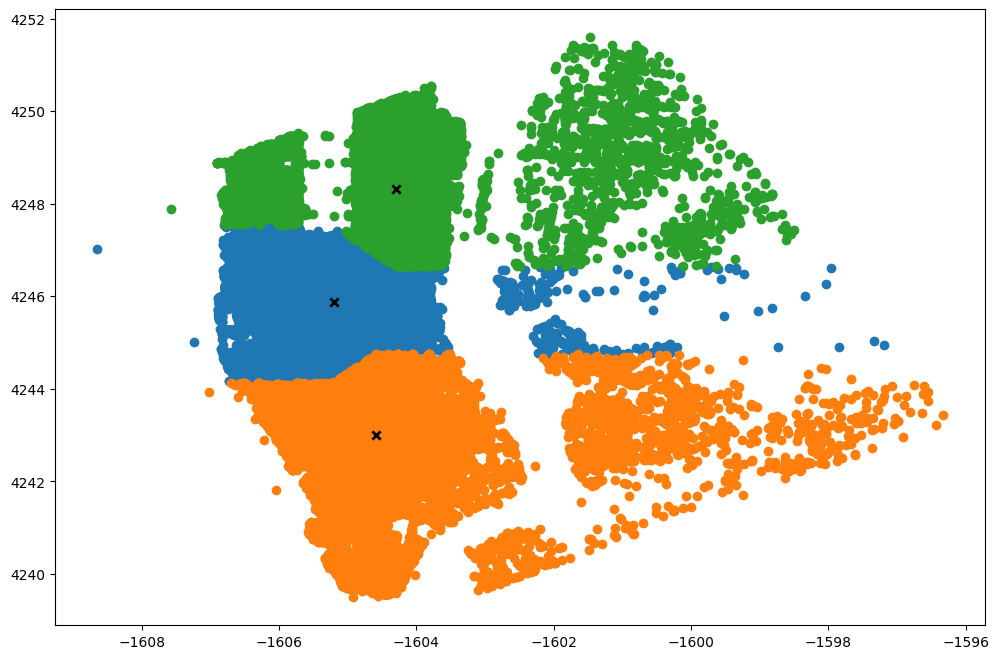

Number of iteration is  44
plot for K = 4


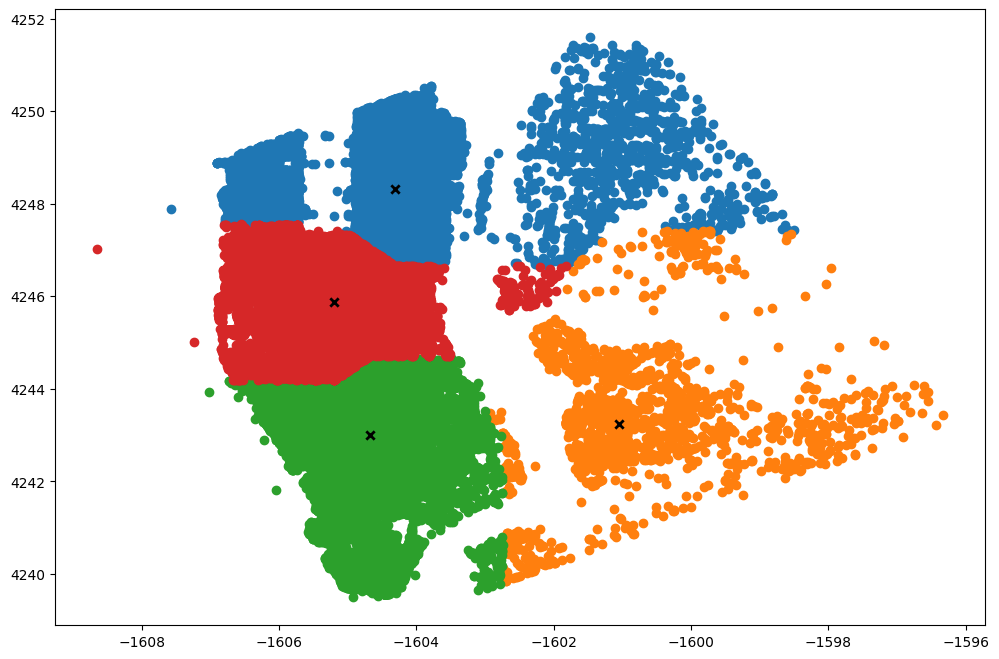

Number of iteration is  23
plot for K = 5


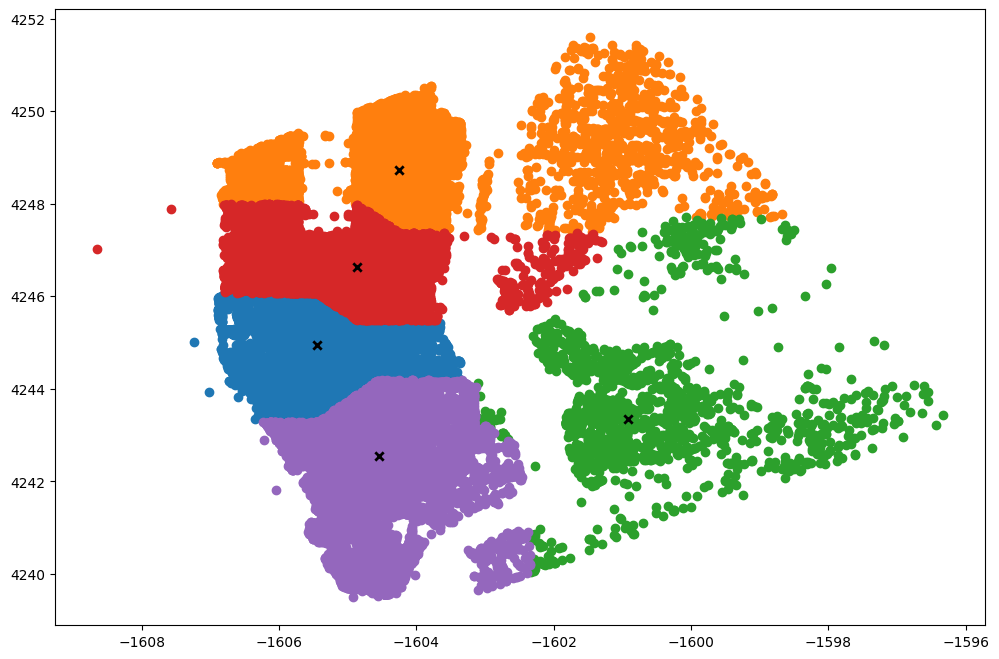

Number of iteration is  78
plot for K = 6


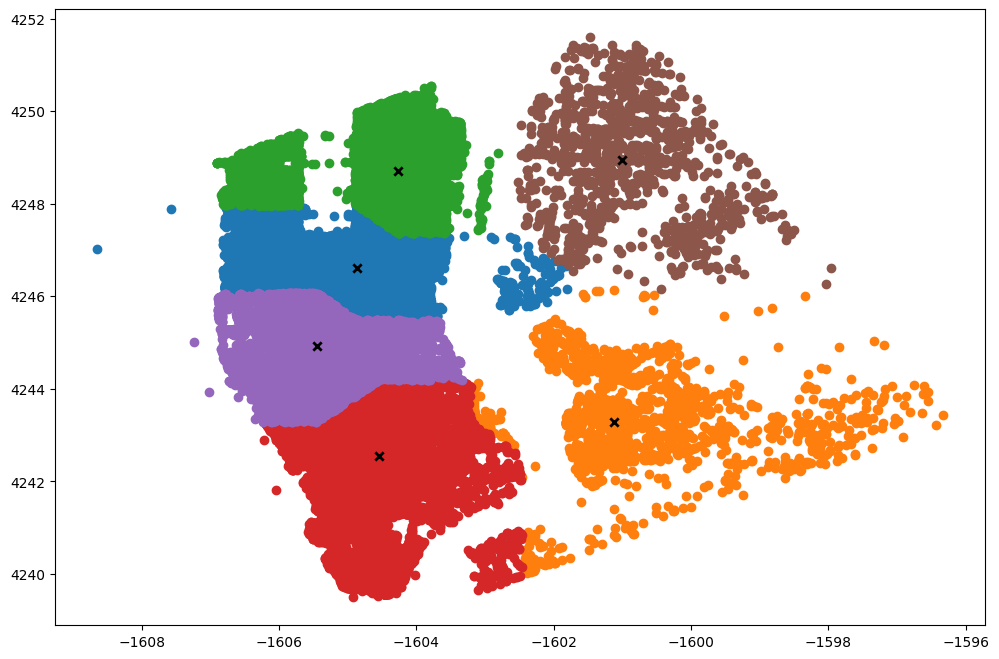

Number of iteration is  29
plot for K = 7


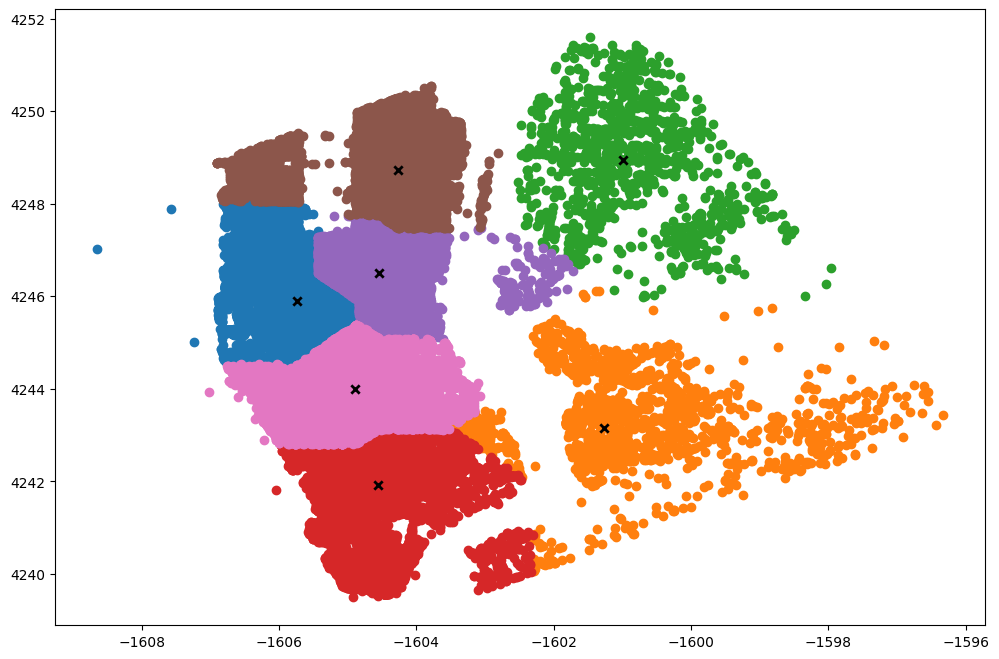

Number of iteration is  52
plot for K = 8


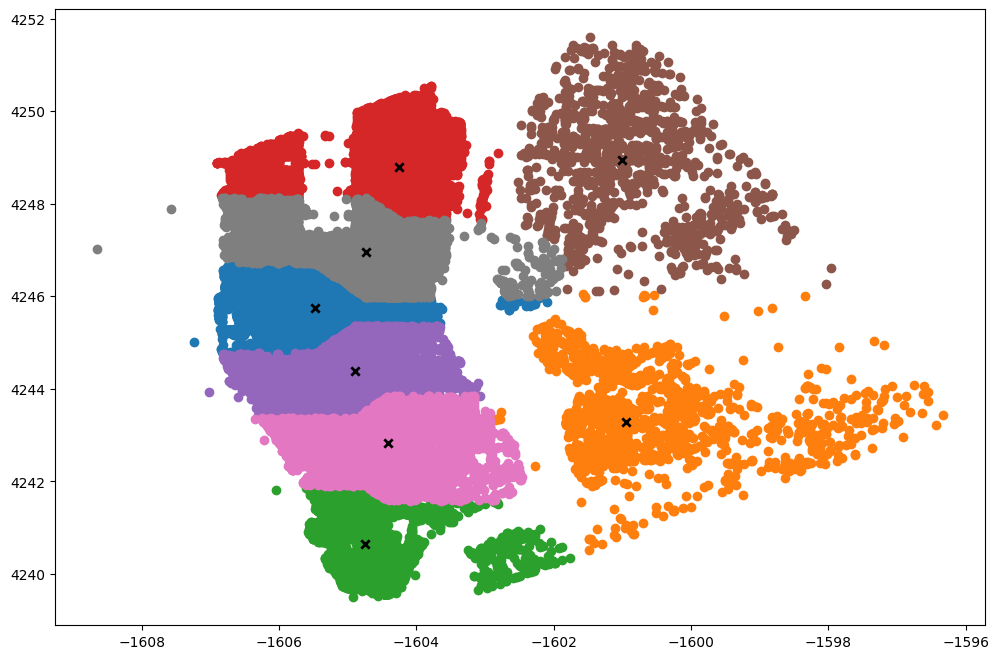

Number of iteration is  32
plot for K = 9


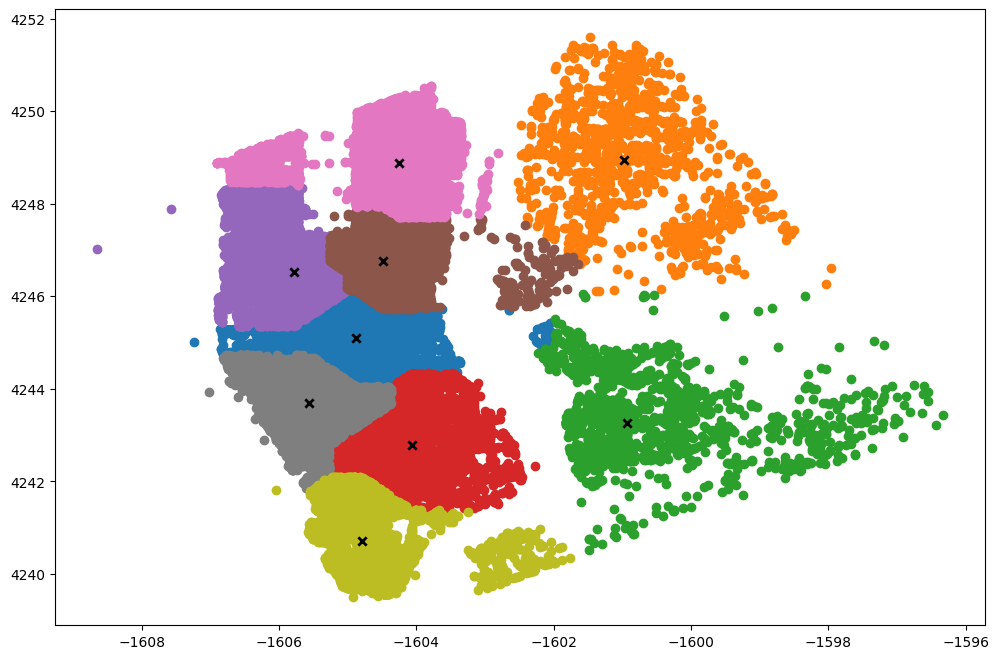

Number of iteration is  58
plot for K = 10


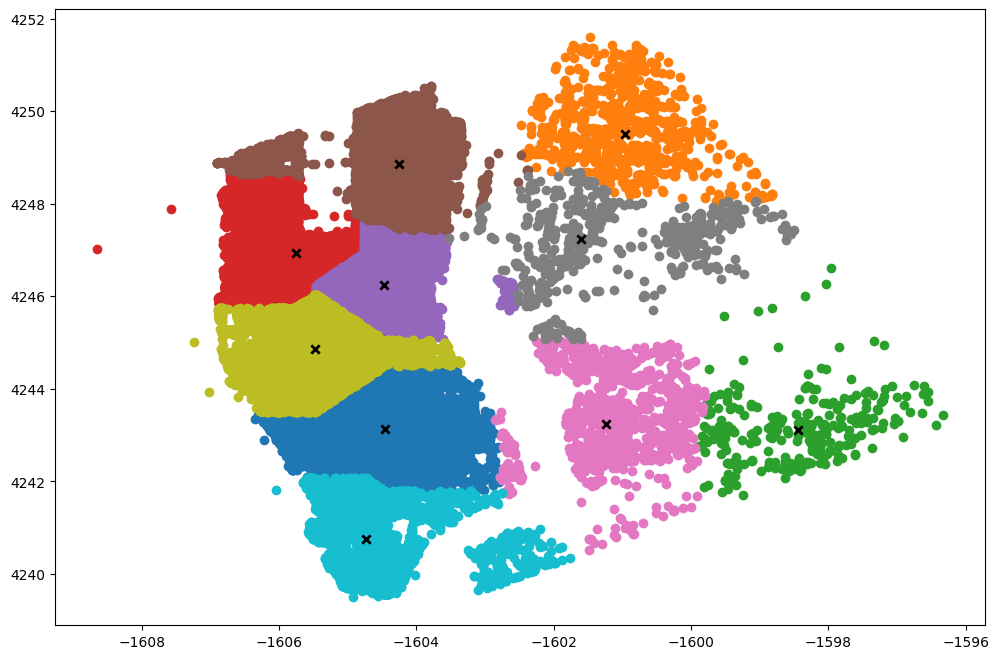

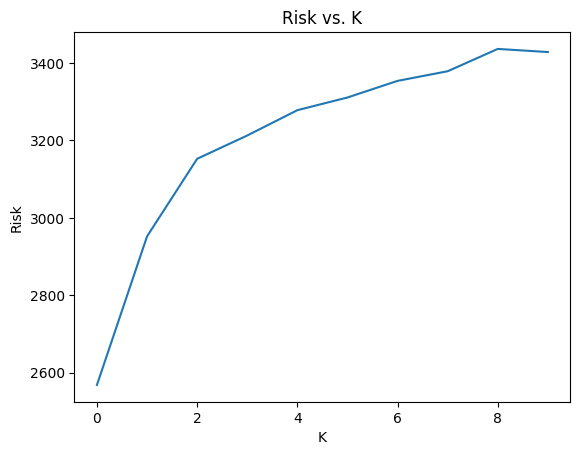

In [ ]:
n = X_rot.shape[0]
train_test_ratio = .8

X_rot_train = X_rot[:int(n*train_test_ratio)]
X_rot_test = X_rot[int(n*train_test_ratio):]

# code was taking forever
max_K = 10
K_list = range(1,max_K+1)
risk_list = []

for K in K_list:
    parking_lots_locations, closest, distortion_list = mykmeans_plus(X_rot_train, K, initialize(X_rot_train, K))
    risk_list.append(calc_risk(parking_lots_locations, X_rot_test, closest, cost_per_parking, cost_per_avarage_distance))

plt.plot(risk_list)
plt.xlabel("K")
plt.ylabel("Risk")
plt.title("Risk vs. K")
plt.show()



---



---



# Q3: Gaussian Mixture Models (35pt)
## Q3.1  KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$,
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$.

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$

- $\text{KL}(q||p)=0$ iff $p=q$.

# Your Solution:

1.

First, note that $\log a \leq a-1, \forall a>0$. From the fact that $q,p$ are probability distributions, we know they are non-negative $\forall z$. Then, using $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$, we have the following:

\begin{align*}
- \text{KL}(q||p) &= - \sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)\\
&= \sum_{z=1}^K q(z) \log\left( \frac{p(z)}{q(z)}\right)\\
&\leq \sum_{z=1}^K q(z) (\frac{p(z)}{q(z)} - 1)\\
&= \sum_{z=1}^K p(z) - q(z)\\
&= \sum_{z=1}^K p(z) - \sum_{z=1}^K q(z)\\
&= 1 - 1\\
&= 0.
\end{align*}

So, $- \text{KL}(q||p) \leq 0$, therefore $\text{KL}(q||p) \geq 0$.

2.

($\Rightarrow$) Suppose $\text{KL}(q||p)=0.$ Then, $\forall z$, either $q(z)=0$ or $\log(\frac{q(z)}{p(z)}) = 0.$ Since $\sum_{z=1}^K q(z)=1,$ there must be a nonempty set of $z$'s where $q(z) \neq 0.$ $\forall z$ where $q(z) \neq 0,$ we have $\log(\frac{q(z)}{p(z)}) = 0 \Rightarrow \frac{q(z)}{p(z)} = 1 \Rightarrow q(z) = p(z)$. Since $p(z) > 0, \forall z,$ and $\sum_{z=1}^K q(z) = 1$, the set of z where $q(z) \neq 0$ must include every $z$, since $\sum_{z=1}^K p(z) = 1$. Thus, $q(z) = p(z), \forall z$.

($\Leftarrow$) If $p(z) = q(z), \forall z,$ then $\log(\frac{q(z)}{p(z)}) = \log(\frac{q(z)}{q(z)}) = \log(1) = 0,$ so $\text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right) = \sum_{z=1}^K q(z)*0 = 0.$



---

## Q3.2 Analytical solutions (10pt)
Show the following results,
- \begin{align}
\hat\pi_k=\arg\max_{ \pi_k} \sum_{i=1}^N \phi_{k}^{(i)} \log \pi_k = \frac{1}{N}\sum_{i=1}^N \phi_{k}^{(i)}
\end{align}
with the constraint that $\sum_{k}\pi_k=1$ and $0\le \pi_k\le 1$

- \begin{align}
(\hat{\mm\mu}_k, \hat{\mm\Sigma}_k)=\arg\max_{ \mm\mu_k, \mm\Sigma_k} \sum_{i=1}^N \phi_{k}^{(i)} \log p(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k) = \left(\frac{\sum_{i=1}^N \phi_{k}^{(i)}  \mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_{k}^{(i)}}, \frac{\sum_{i=1}^N \phi_{k}^{(i)}  \left[\mathbf{x}^{(i)}-\hat{\mm\mu}_k\right]\left[\mathbf{x}^{(i)}-\hat{\mm\mu}_k\right]^T}{\sum_{i=1}^N \phi_{k}^{(i)}}\right)
\end{align}


# Your Solution:

We must consider the following equation from lecture for these derivations:
$$\theta^{t+1} = \arg\max_{ \mm\pi_k, \mm\mu_k, \mm\Sigma_k} \sum_{i=1}^N \phi_{k}^{(i)} \log \pi_k + \phi_{k}^{(i)} \log p(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k)$$

When optimized, $\theta^{t+1} = \log(\ell(\theta^{t+1})) = L(\theta^{t+1})$, thus...

1.

\begin{align*}
\frac{\delta L(\theta)}{\delta \pi_k} = 0 &= \sum_{i=1}^N \frac{\phi_{k}^{(i)}}{\pi_k} + \alpha\\
\pi_k &= -  \frac{ \sum_{i=1}^N\phi_{k}^{(i)}}{\alpha}\\
\text{where...  } \sum_{k=1}^K \pi_k = 1 &= - \sum_{k=1}^K  \frac{ \sum_{i=1}^N\phi_{k}^{(i)}}{\alpha}\\
&= - \frac{ \sum_{k=1}^K \sum_{i=1}^N\phi_{k}^{(i)}}{\alpha}\\
\alpha & = - \sum_{k=1}^K \sum_{i=1}^N\phi_{k}^{(i)}\\
\text{so...  } 0 &= \sum_{i=1}^N \frac{\phi_{k}^{(i)}}{\pi_k} + \alpha\\
0 &= \sum_{i=1}^N \frac{\phi_{k}^{(i)}}{\pi_k} - \sum_{k=1}^K \sum_{i=1}^N\phi_{k}^{(i)}\\
\frac{\sum_{i=1}^N \phi_{k}^{(i)}}{\pi_k} &= \sum_{k=1}^K \sum_{i=1}^N\phi_{k}^{(i)}\\
\pi_k &= \frac{\sum_{i=1}^N \phi_{k}^{(i)}}{\sum_{k=1}^K \sum_{i=1}^N\phi_{k}^{(i)}}\\
&= \frac{\sum_{i=1}^N \phi_{k}^{(i)}}{\sum_{i=1}^N \sum_{k=1}^K\phi_{k}^{(i)}}\\
&= \frac{\sum_{i=1}^N \phi_{k}^{(i)}}{\sum_{i=1}^N 1}\\
\hat\pi_k &= \frac{1}{N} \sum_{i=1}^N \phi_{k}^{(i)}\\
\end{align*}





2.

\begin{align*}
\frac{\delta L(\theta)}{\delta \mu_k} = 0 &= \sum_{i=1}^N \phi_{k}^{(i)} \frac{\delta }{\delta \mu_k} \left(\log p(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k)\right)\\
&= \sum_{i=1}^N \phi_{k}^{(i)} \frac{\delta }{\delta \mu_k} \left(\log \mathcal{N}(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k)\right)\\
&= \sum_{i=1}^N \phi_{k}^{(i)} \frac{\mathcal{N}(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k) * \mm\Sigma_k^{-1}(\mathbf{x}^{(i)}-\mu_k)}{\mathcal{N}(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k)}\\
&= \sum_{i=1}^N \phi_{k}^{(i)} \mm\Sigma_k^{-1}(\mathbf{x}^{(i)}-\mu_k)\\
&= \mm\Sigma_k^{-1} \sum_{i=1}^N \phi_{k}^{(i)}(\mathbf{x}^{(i)}-\mu_k)\\
\mm\Sigma_k*0 &= \mm\Sigma_k \mm\Sigma_k^{-1} \sum_{i=1}^N \phi_{k}^{(i)}(\mathbf{x}^{(i)}-\mu_k)\\
0 &= \sum_{i=1}^N \phi_{k}^{(i)}\mathbf{x}^{(i)} - \sum_{i=1}^N \phi_{k}^{(i)}\mu_k\\
\hat\mu_k &= \frac{\sum_{i=1}^N \phi_{k}^{(i)}\mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_{k}^{(i)}}\\
\end{align*}

3.

First, we note that

\begin{align*}
\log\left(\mathcal{N}(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k) \right) &= \log\left(  \frac{\exp\left(-\frac{1}{2}(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mu_c)\right) }{\sqrt{(2\pi)^d|\Sigma_c|}}  \right)\\
&= \log \left( \exp\left(-\frac{1}{2}(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mu_c)\right) \right)\\
&- \log \left( \sqrt{(2\pi)^d|\Sigma_c|}  \right)\\
&= -\frac{1}{2}(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mu_c) - \frac{d}{2} \log(2\pi) - \frac{1}{2}\log(|\Sigma_c|)
\end{align*}

Then, we have the following:

\begin{align*}
\frac{\delta L(\theta)}{\delta \Sigma_k} = 0 &= \sum_{i=1}^N \phi_{k}^{(i)} \frac{\delta }{\delta \Sigma_k} \left(\log \mathcal{N}(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k)\right)\\
&= \sum_{i=1}^N \phi_{k}^{(i)} \frac{\delta }{\delta \Sigma_k} \left( -\frac{1}{2}(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mu_c) - \frac{d}{2} \log(2\pi) - \frac{1}{2}\log(|\Sigma_c|) \right)\\
&= \frac{1}{2}\sum_{i=1}^N \phi_{k}^{(i)} \left(\Sigma_c^{-1}(\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1} - \Sigma_c^{-1} \right)\\
0*(-2)&= \sum_{i=1}^N \phi_{k}^{(i)} \Sigma_c^{-1}(\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1} - \sum_{i=1}^N \phi_{k}^{(i)}\Sigma_c^{-1}\\
0*\Sigma_c &= \Sigma_c^{-1}\sum_{i=1}^N \phi_{k}^{(i)} (\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}\Sigma_c - \sum_{i=1}^N \phi_{k}^{(i)}\Sigma_c^{-1}\Sigma_c\\
\Sigma_c*0 &= \Sigma_c\Sigma_c^{-1}\sum_{i=1}^N \phi_{k}^{(i)} (\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top - \Sigma_c\sum_{i=1}^N \phi_{k}^{(i)}\\
0 &= \sum_{i=1}^N \phi_{k}^{(i)} (\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top - \Sigma_c\sum_{i=1}^N \phi_{k}^{(i)}\\
\hat\Sigma_c & = \frac{\sum_{i=1}^N \phi_{k}^{(i)} (\mathbf{x}-\mu_c)(\mathbf{x}-\mu_c)^\top}{\sum_{i=1}^N \phi_{k}^{(i)}}
\end{align*}



---

## Q3.3. Construct a function to calculate log likelihood (5pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\hat{\mm\theta}=\{\hat\pi_k, \hat{\mm\mu}_k, \hat{\mm\Sigma}_k\}_{k=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$

In [ ]:
#  Q3.3 your code starts here
def take_normal(X, Mu, Sigma):
    # for vector X, mu and covariance matrix sigma
    top = np.exp((-1/2)*np.matmul(np.matmul((X-Mu).T,np.linalg.inv(Sigma)),(X-Mu)))
    bottom = np.sqrt(np.linalg.det(Sigma)*((2*np.pi)**X.shape[0]))
    return top/bottom

def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):

    N = X.shape[0]
    total = 0
    for i in range(N):
        inner = 0
        for k in range(K):
            temp = Pi[k] * take_normal(X[i], Mu_opt[k], Sigma_opt[k])
            inner += temp
        total += np.log(inner)

    return total



---





---



## Q3.4 BIC (10pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. We will use slightly more complicated criterion, Bayesian information criterion (BIC).

Remember the definition of BIC is
\begin{align}
\mr{BIC}(K) = \log p(D|\hat{\mm\theta})-\frac{d_K}{2}\log(N)
\end{align}
The first term is the log-likelihood $\log\ell(\hat{\mm\theta})$, $d_K$ is the number of free parameters in the model and $N$ is the number of samples. Overall, the higher BIC value, the better of the model.

What is $d_K$ in GMM for $K$ clusters?
Please construct a function to calculate the Bayesian information criterion.


# Your Solution:

In [ ]:
def BIC(X,K,lg):
    # d_K is just K in GMM
    return lg - (K * np.log(X.shape[0]))/2



---




## Q3.5. Testing with the synthetic dataset (5pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with different random initial conditions, to make sure the parameter is not trapped in the local optimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$.

(It is always a good habit to start your code for some special $K$, say $K=3$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true -O 2DGaussianMixture.csv


--2024-11-21 16:33:39--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12901 (13K) [text/plain]
Saving to: ‘2DGaussianMixture.csv’

2DGaussianMixture.c 100%[===================>]  12.60K  --.-KB/s    in 0s      

2024-11-21 16:33:40 (63.6 MB/s) - ‘2DGaussianMixture.csv’ saved [12901/12901]



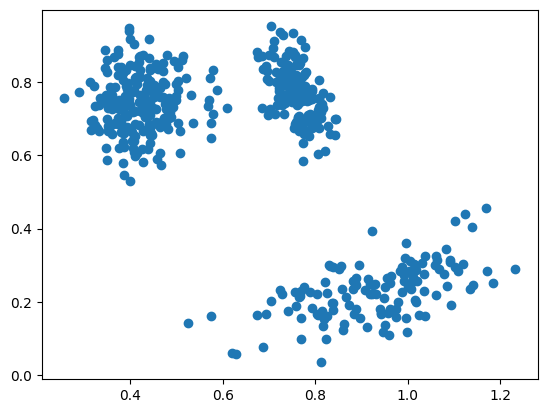

In [ ]:
X = np.genfromtxt("2DGaussianMixture.csv", delimiter=",")
X = X[1:]
X = X[:,1:]
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
from scipy.stats import multivariate_normal

def euclidean_distance(x1, x2):
    return np.sqrt(sum((x1 - x2) ** 2))

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()
    plt.show()

# initialization for Kmeans++ algorithm
def initialize(X, K):

    ## Step 1: initialize the centroids list and add
    ## a randomly selected data point to the list
    n_samples, n_features = X.shape
    random_sample_idxs = random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]

    ## compute remaining K - 1 centroids
    for c_id in range(K - 1):
        ## Step 2: initialize a list to store distances of data
        ## points from nearest centroid
        ## compute distance of 'point' from each of the previously
        ## selected centroid and store the minimum distance
        dist = np.zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [euclidean_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

        ## Step 3: select data point with maximum distance as our next centroid
        next_centroid = X[np.argmax(dist), :]
        centroids=np.vstack([centroids,next_centroid])

    return centroids

def initialize_theta(X, K, centroids):
    # N has the number of rows while d has the number of columns of dataset X
    N, d = X.shape

    # initial weights given to each cluster are stored in phi or P(Zi=c)
    Pi = np.full(shape=K, fill_value=1/K)

    # initial weights given to each data point wrt to each cluster or P(Zi=c|Xi)
    weights = np.full(shape=(N,K), fill_value=1/K)


    # initial value of mean of K Gaussians
    Mu = [  centroids[i,:] for i in range(K) ]

    # initial value of covariance matrix of K Gaussians
    Sigma = [ np.cov(X.T) for _ in range(K) ]
    # theta =(Mu,Sigma,Pi)
    return Pi, Mu, Sigma, weights

# computer posterior probability of each data point wrt each cluster
# parameters are Pi, Mu, Sigma
def predict_posterior(X, K, Pi, Mu, Sigma):
    N = X.shape[0]
    # Creates a N*K matrix denoting probability of each point wrt each cluster
    likelihood = np.zeros( (N, K) )
    for i in range(K):
        distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
            # pdf : probability denisty function
        likelihood[:,i] = distribution.pdf(X)

    numerator = likelihood * Pi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


# E-Step: update weights holding Pi Mu Sigma constant
def e_step(X, K, Pi, Mu, Sigma):
    # updated weights(i,c)=P(Zi=c|Xi)
    weights   = predict_posterior(X, K, Pi, Mu, Sigma)
    return weights


# M-Step: update Mu, Sigma, Pi, holding weights constant
def m_step(X, K, weights):
    # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster Pi_c
    Pi_update = weights.mean(axis=0)
    Mu_update = [[] for _ in range(K)]
    Sigma_update = [[] for _ in range(K)]
    for i in range(K):
        weight_i = weights[:, [i]]
        total_weight = weight_i.sum()
        Mu_update[i]    = (X * weight_i).sum(axis=0) / total_weight
        Sigma_update[i] = np.cov(X.T, aweights=(weight_i/total_weight).flatten(), bias=True)

    return Pi_update, Mu_update, Sigma_update

# predict function
def predict(X, K, Pi, Mu, Sigma):
   weights = predict_posterior(X, K, Pi, Mu, Sigma)
   # datapoint belongs to cluster with maximum probability
   # returns this value
   return np.argmax(weights, axis=1)

def GMM_fit(X, K,centroids, max_iter=200, threshold =0.0001):
  # initialise parameters like weights, Pi, Mu, Sigma of all Gaussians in dataset X
  # step 1
  Pi, Mu, Sigma, weights = initialize_theta(X,K,centroids)
  for j in range(max_iter):
    z = predict(X, K, Pi, Mu, Sigma)
    Mu_array = np.array(Mu)
    # plot_clusters(X, z, Mu_array)
    # step 2 iterate to update the value of P(Zi=c|Xi)
    weights = e_step(X, K, Pi, Mu, Sigma)
    Pi_old  = Pi;
    Mu_old  = Mu;
    # step 3 iterate to update the value of Mu, Sigma and Pi as the clusters shift
    Pi, Mu, Sigma  = m_step(X, K, weights)

    # for stopping
    distances = [ linalg.norm(Mu[i] - Mu_old[i]) for i in range(K)]
    if sum(distances) < threshold:
      print('Number of iteration is ', j+1)
      break

  z = predict(X, K, Pi, Mu, Sigma)
  Mu_array = np.array(Mu)
  plot_clusters(X, z, Mu_array)

  return z, Pi, Mu, Sigma

Number of iteration is  7


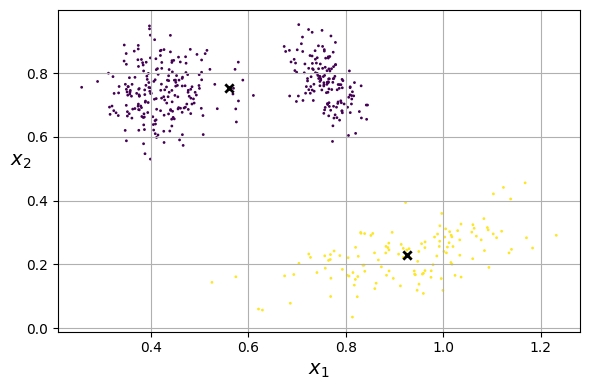

Number of iteration is  22


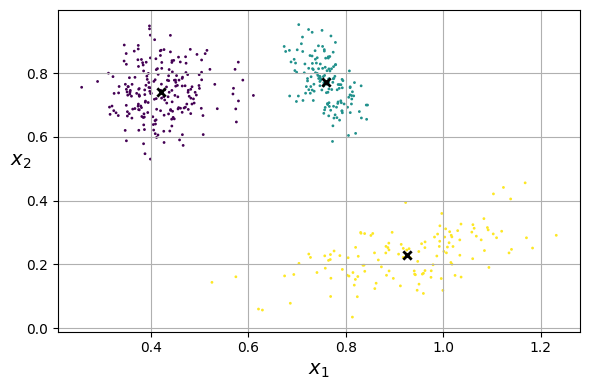

Number of iteration is  91


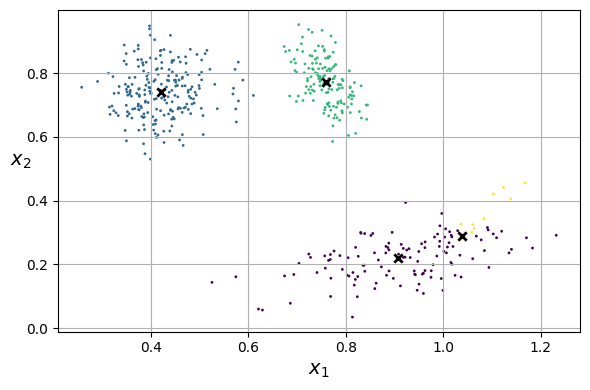

Number of iteration is  56


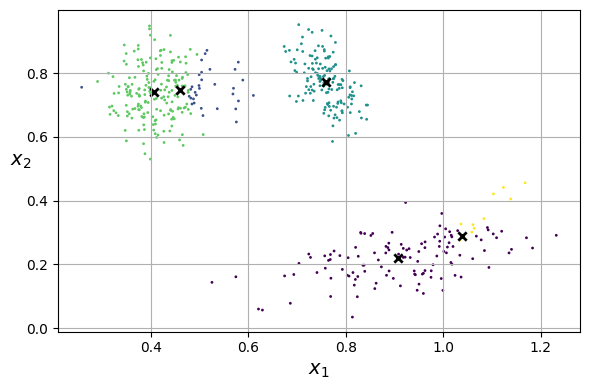

Number of iteration is  78


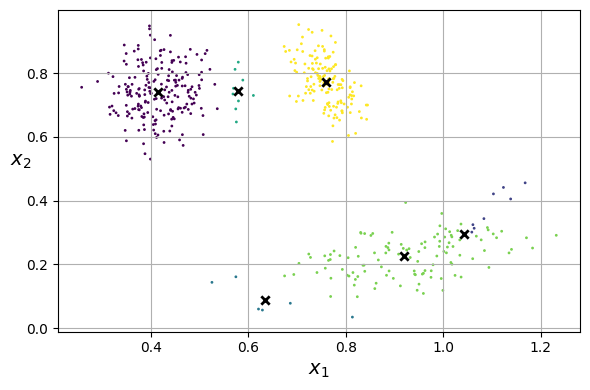

In [ ]:
min_K = 2
max_K = 6
K_list = range(min_K,max_K+1)
BIC_list = []
run_sim = True

if run_sim:
    sim_num = 10
else:
    sim_num = 1

for sim in range(sim_num):
    for K in K_list:
        centroids = initialize(X,K)
        z, Pi, Mu, Sigma=GMM_fit(X, K,centroids)
        Pi = np.array(Pi)
        Mu = np.array(Mu)
        Sigma = np.array(Sigma)
        lg = log_likelihood(X,K,Pi,Mu,Sigma)
        if sim == 0:
            BIC_list.append(BIC(X,K,lg))
        else:
            BIC_list[K-min_K] += BIC(X,K,lg)

BIC_list = np.array(BIC_list)
BIC_list = BIC_list/sim_num

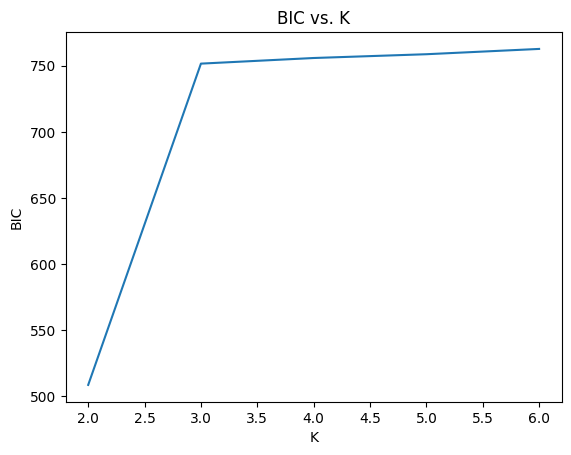

In [ ]:
plt.plot(K_list, BIC_list)
plt.xlabel("K")
plt.ylabel("BIC")
plt.title("BIC vs. K")
plt.show()

In [ ]:
print(BIC_list)

[508.61468914 751.56421253 755.81375715 758.67386677 762.6824829 ]


Since the BIC values for $K=4,5,6$ are all very similar, it depends on randomness which outputs as "the best" $K$ for this particular clustering, typically within an integer value of each other hovering around $BIC = 759$. I did a small simulation of size 10 to take the average over multiple runs and got $K=6$ with $BIC = 759.9$, so I choose $K=6$ as the best cluster number.